## Fetching last 1 year of Kolkata weather data from Open-Meteo and saving the dataset as Rainfall.csv

In [1]:
import requests
import pandas as pd
from datetime import date, timedelta

# For Kolkata
latitude, longitude = 22.57, 88.36
end_date = date.today()
start_date = end_date - timedelta(days=365)

url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "start_date": start_date.strftime("%Y-%m-%d"),
    "end_date": end_date.strftime("%Y-%m-%d"),
    "daily": [
        "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean",
        "precipitation_sum", "windspeed_10m_max", "winddirection_10m_dominant",
        "relative_humidity_2m_mean", "cloudcover_mean", "sunshine_duration"
    ],
    "timezone": "auto"
}
res = requests.get(url, params=params).json()
df = pd.DataFrame(res["daily"])

# Mapping to schema
mapped_df = pd.DataFrame({
    "day": range(1, len(df) + 1),
    "maxtemp": df["temperature_2m_max"],
    "temparature": df["temperature_2m_mean"],
    "mintemp": df["temperature_2m_min"],
    "humidity": df["relative_humidity_2m_mean"],
    "cloud": df["cloudcover_mean"],
    "rainfall": df["precipitation_sum"].apply(lambda x: "yes" if x > 2.5 else "no"),
    "sunshine": df["sunshine_duration"].div(3600),  # convert seconds → hours
    "winddirection": df["winddirection_10m_dominant"],
    "windspeed": df["windspeed_10m_max"]
})

# Save final dataset
save_path = "Rainfall.csv"
mapped_df.to_csv(save_path, index=False)

mapped_df.head(), mapped_df.tail(), mapped_df.shape

(   day  maxtemp  temparature  mintemp  humidity  cloud rainfall   sunshine  \
 0    1     31.9         28.0     25.5      87.0   90.0      yes   8.227261   
 1    2     32.1         28.5     25.7      84.0   97.0       no  10.976372   
 2    3     33.0         29.4     26.3      85.0   83.0      yes  11.001269   
 3    4     33.4         29.1     25.6      84.0   71.0      yes  10.775947   
 4    5     32.3         28.7     26.5      84.0   72.0      yes   9.150833   
 
    winddirection  windspeed  
 0          172.0       12.8  
 1          160.0       18.4  
 2           85.0       11.0  
 3           95.0       15.9  
 4          103.0       18.0  ,
      day  maxtemp  temparature  mintemp  humidity  cloud rainfall   sunshine  \
 361  362     32.3         28.9     25.8      86.0   78.0      yes  10.752561   
 362  363     33.7         29.6     25.8      82.0   97.0      yes  10.386583   
 363  364     30.2         27.5     25.7      87.0   99.0      yes   5.764364   
 364  365    

## Import dataset dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
print('success')

success


## Load dataset

In [3]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,maxtemp,temparature,mintemp,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,31.9,28.0,25.5,87.0,90.0,yes,8.227261,172.0,12.8
1,2,32.1,28.5,25.7,84.0,97.0,no,10.976372,160.0,18.4
2,3,33.0,29.4,26.3,85.0,83.0,yes,11.001269,85.0,11.0
3,4,33.4,29.1,25.6,84.0,71.0,yes,10.775947,95.0,15.9
4,5,32.3,28.7,26.5,84.0,72.0,yes,9.150833,103.0,18.0


## Dataset shape

In [4]:
df.shape

(366, 10)

## Dataset info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   maxtemp        364 non-null    float64
 2   temparature    364 non-null    float64
 3   mintemp        364 non-null    float64
 4   humidity       364 non-null    float64
 5   cloud          364 non-null    float64
 6   rainfall       366 non-null    object 
 7   sunshine       364 non-null    float64
 8   winddirection  364 non-null    float64
 9   windspeed      364 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 28.7+ KB


## Summary statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,183.500000,105.799338,1.0,92.250000,183.500000,274.75000,366.000000
maxtemp,364.0,31.164560,3.746195,20.1,28.900000,31.250000,33.20000,42.100000
temparature,364.0,26.562912,3.614704,17.1,24.175000,27.500000,28.90000,34.300000
mintemp,364.0,22.851923,4.288767,12.0,19.675000,24.650000,26.00000,29.500000
humidity,364.0,76.214286,11.268974,40.0,68.000000,78.000000,86.00000,94.000000
cloud,364.0,52.137363,38.037503,0.0,15.000000,49.000000,95.00000,100.000000
sunshine,364.0,8.978725,2.787518,0.0,8.309298,9.948944,10.75553,12.012014
winddirection,364.0,189.565934,97.233657,0.0,130.750000,189.000000,251.00000,360.000000
windspeed,364.0,11.641758,4.106631,4.5,8.800000,10.800000,13.52500,31.600000


## Null values count

In [7]:
df.isnull().sum()

day              0
maxtemp          2
temparature      2
mintemp          2
humidity         2
cloud            2
rainfall         0
sunshine         2
winddirection    2
windspeed        2
dtype: int64

## Clean and check column names

In [8]:
df.rename(str.strip, axis='columns', inplace=True)
df.columns

Index(['day', 'maxtemp', 'temparature', 'mintemp', 'humidity', 'cloud',
       'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

## Fill missing values

In [9]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        val = df[col].mean()
        df[col] = df[col].fillna(val)

df.isnull().sum().sum()

np.int64(0)

## Rainfall distribution

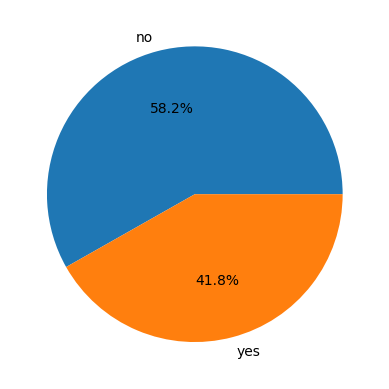

In [10]:
plt.pie(df['rainfall'].value_counts().values,
        labels=df['rainfall'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

## Class-wise averages

In [11]:
df.groupby('rainfall').mean()

,day,maxtemp,temparature,mintemp,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,
no,155.492958,30.868681,25.603408,21.031943,69.809524,30.569365,10.078921,205.390290,10.261425
yes,222.490196,31.576471,27.898693,25.385621,85.130719,82.163399,7.447079,167.535948,13.563399


## Select numerical features

In [12]:
features = list(df.select_dtypes(include=np.number).columns)
features.remove('day')  # 'day' is for readability, not ML
print(features)

['maxtemp', 'temparature', 'mintemp', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


## Distribution plots

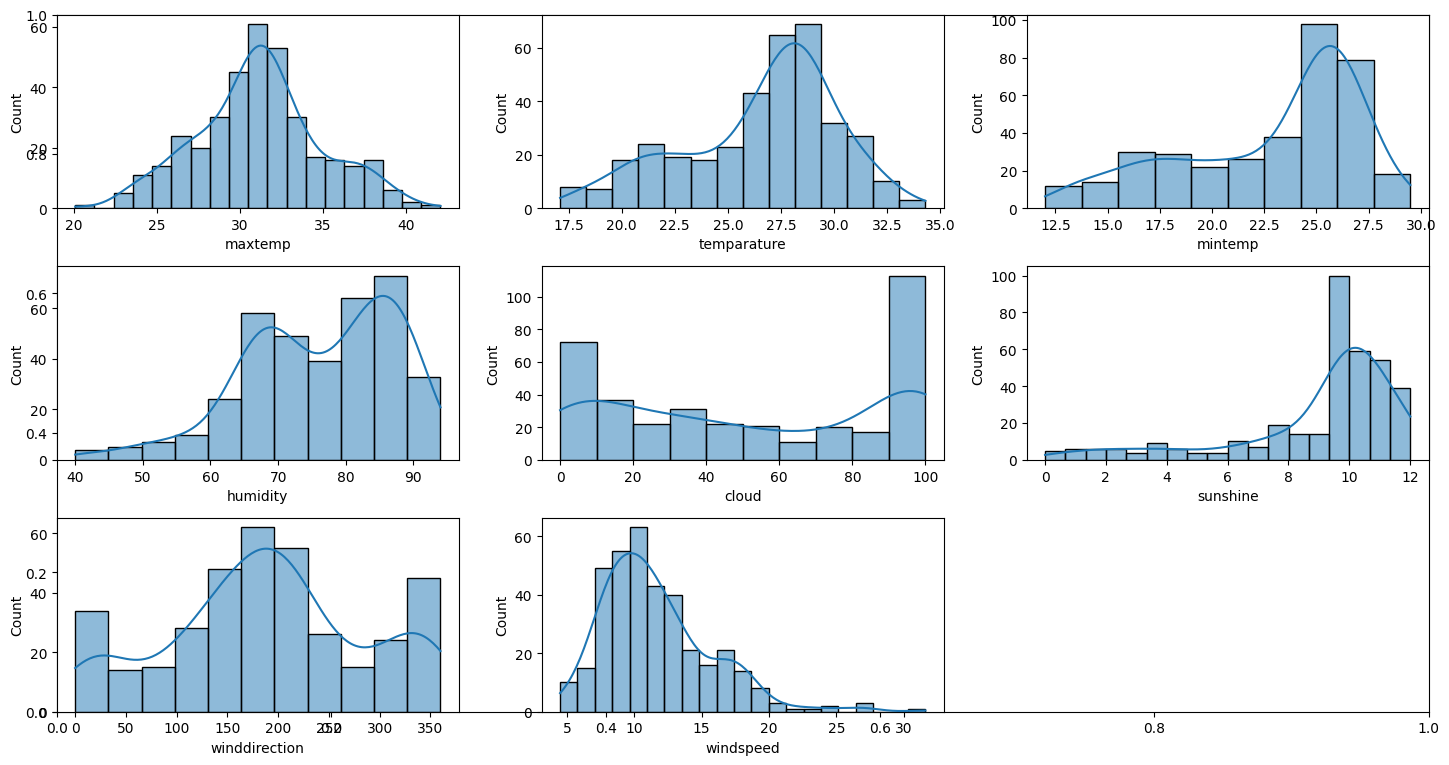

In [13]:
plt.subplots(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(3,3, i + 1)
    sb.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

## Boxplots

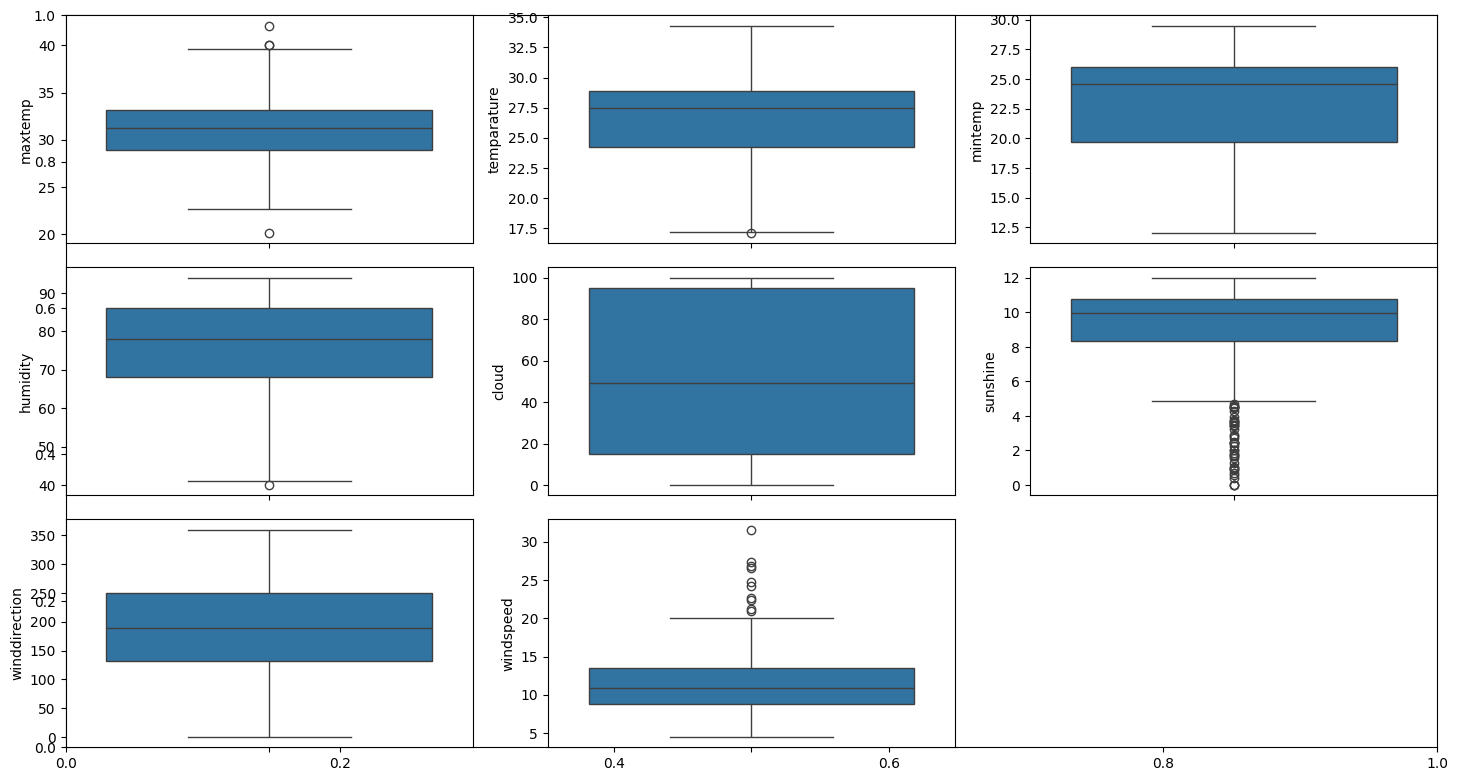

In [14]:
plt.subplots(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(3,3, i + 1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

## Encode rainfall labels

In [15]:
df.replace({'yes':1, 'no':0}, inplace=True)

## Correlation heatmap

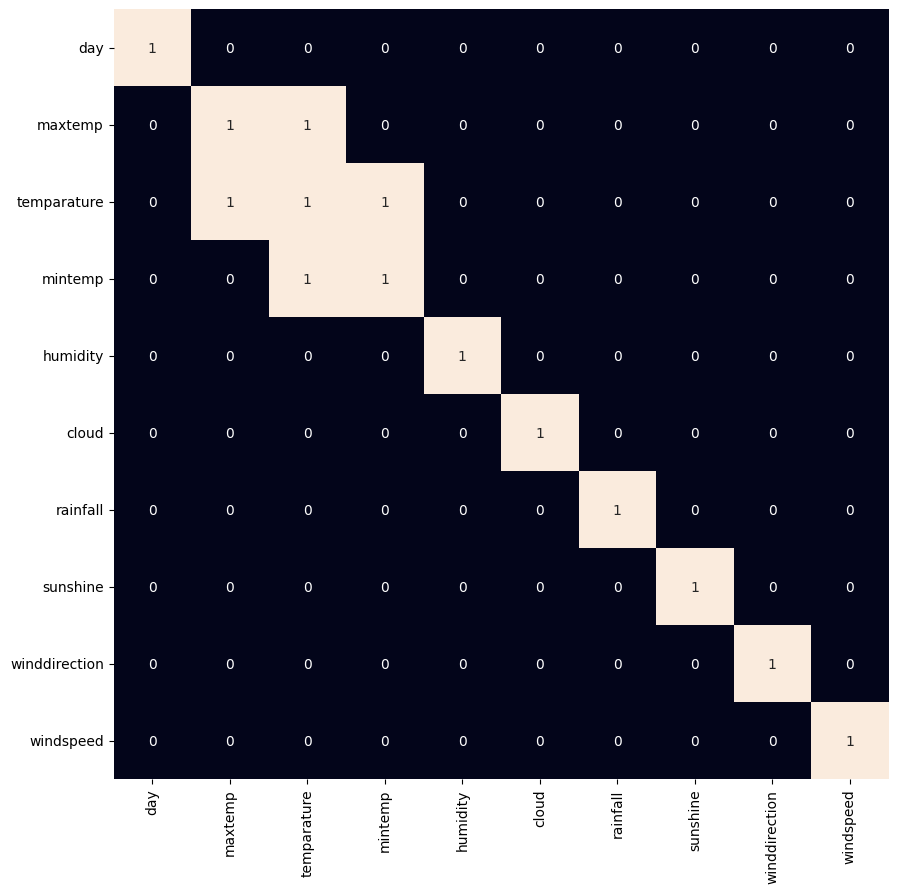

In [16]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

## Drop redundant features

In [17]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

## Import ML model dependencies

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
print('success')

success


## Define features and target

In [19]:
features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

## Train-validation split (last 30%)

In [20]:
split_index = int(len(df) * 0.7)
X_train, Y_train = features.iloc[:split_index], target.iloc[:split_index]
X_val, Y_val = features.iloc[split_index:], target.iloc[split_index:]

ros = RandomOverSampler(sampling_strategy='minority', random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

## Normalize features

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

## Train models

In [22]:
models = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel='rbf', probability=True)
]

for model in models:
    model.fit(X, Y)
    print(f'{model} : ')
    train_preds = model.predict_proba(X) 
    print('Training AUC : ', metrics.roc_auc_score(Y, train_preds[:,1]))
    val_preds = model.predict_proba(X_val) 
    print('Validation AUC : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
    print()

LogisticRegression() : 
Training AUC :  0.9343804253472223
Validation AUC :  0.8780096308186196

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training AUC :  1.0
Validation AUC :  0.837613697164259

SVC(probability=True) : 
Training AUC :  0.9608289930555556
Validation AUC :  0.79

## Confusion matrix (SVC)

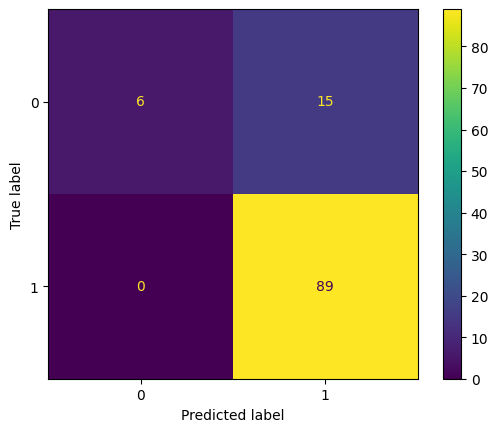

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(models[2], X_val, Y_val)
plt.show()

## Classification report (SVC)

In [24]:
print(metrics.classification_report(Y_val, models[2].predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44        21
           1       0.86      1.00      0.92        89

    accuracy                           0.86       110
   macro avg       0.93      0.64      0.68       110
weighted avg       0.88      0.86      0.83       110

